<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Привет! Спасибо, что прислал работу во время :) 
    
Меня зовут Евгений, и я буду проверять твой проект) 
Ты проделал большую работу над проектом, однако в любом деле всегда можно можно что-то улучшить. Моя основная цель — не показать, что где—то совершены какие—либо ошибки, а поделиться своим опытом, который поможет тебе в дальнейших работах. Далее в файле ты сможешь увидить мои комментарии, постарайся учесть их при выполнении следующих заданий.    

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Рекомендуется делать краткое вступление в работу и описание того, что планируешь сделать (если план у тебя уже сформирован), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Так работа станет выглядеть презентабельнее.

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки:

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

Считываем файл с данными. Смотрим на выборку из 15 случайных строк таблицы:

In [14]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6491,14,4200000.0,40.0,2019-04-24T00:00:00,1,2.60,16.0,16.00,10,False,...,11.0,1.0,Санкт-Петербург,27428.0,9241.0,0.0,NaN,0.0,NaN,NaN
12391,4,6900000.0,47.9,2018-06-12T00:00:00,2,3.50,7.0,27.00,6,NaN,...,10.0,NaN,Санкт-Петербург,25651.0,4225.0,3.0,312.0,1.0,817.0,144.0
9245,10,4345000.0,66.0,2018-05-17T00:00:00,2,2.60,10.0,34.00,6,NaN,...,12.0,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,189.0
8573,9,5600000.0,75.0,2018-08-15T00:00:00,4,2.50,9.0,54.60,7,NaN,...,6.5,1.0,Санкт-Петербург,18997.0,13063.0,0.0,NaN,0.0,NaN,24.0
3424,19,7500000.0,75.6,2016-04-17T00:00:00,3,2.60,16.0,45.72,16,False,...,12.1,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,119.0
9298,19,7700000.0,66.0,2017-09-19T00:00:00,2,2.80,13.0,32.00,13,NaN,...,25.0,1.0,Санкт-Петербург,40648.0,9888.0,1.0,1248.0,0.0,NaN,310.0
8820,20,4800000.0,49.7,2018-09-22T00:00:00,2,2.85,21.0,28.60,1,False,...,11.0,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,125.0
3343,15,8990000.0,75.0,2018-11-02T00:00:00,2,2.75,24.0,40.00,22,NaN,...,13.5,1.0,Санкт-Петербург,11425.0,13107.0,0.0,NaN,0.0,NaN,118.0
19275,11,4500000.0,41.0,2018-10-26T00:00:00,2,NaN,5.0,26.50,4,NaN,...,4.8,NaN,Санкт-Петербург,9989.0,11606.0,0.0,NaN,0.0,NaN,15.0
20546,10,3600000.0,53.0,2016-05-26T00:00:00,2,NaN,5.0,30.00,5,False,...,9.0,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,95.0


Видим, что файл считался правильно. Большинство данных в таблице - количественные. В некоторых полях видны пропуски. Посмотрим на общие сведения о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Действительно, многие поля содрежат относительно большое количество пустых значений. Названия столбцов хорошо характеризуют содержание данных, вместе с тем, следует обратить внимание на формат данных, который не везде совпадает. 

Посмотрим на уникальные значения поля со строковым значением:

In [4]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Довольно много уникальных значений, высокая вероятность наличия ошибок в регистре. Следует привести все к единому регистру.

В заключении посмотри на наименование столбцов:

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Еще раз убеждаемся, что здесь все в порядке.

### Вывод

Таблица представляет из себя данные об объявлениях по продаже квартир. Каждая строка содержит информацию по одному объявлению, признакам относящимся к кваритре, сделке и публикацией объявления. При изучении таблицы можно увидеть несколько "проблемных" моментов с точки зрения дальнейшей обработки данных: 

1. Количество значений в стоблцах различно - имеются пропуски;
2. Поле "locality_name" содержит строки различного регистра;
3. Формат данных столбцов иногда не соотносится с типом содержащихся в них данных;
4. Отдельные столбцы имеют тип float64, что возможно избыточно;
5. В поле "days_exposition" присутствуют пропущенные значения, что подозрительно.

Предположительно, дополнительно может быть полезна категоризация по полю "locality_name" и по "last_price".


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Хорошо «сырые» данные посмотрели, теперь давай их обработаем.
    
Как ты думаешь откуда сформировались пропуски ?
    
</div>

### Шаг 2. Предобработка данных

Предобраотку начнем с переведения значений в столбце "locality_name" в единый регистр:

In [6]:
data['locality_name'] = data['locality_name'].str.lower()

Далее посмотрим на пропущенные значения по всему дата фрейму:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что таких достаточно много. Записями с пропущенными значениями перенебречь мы не можем, как и оставить их пустыми, поэтому похоже придется каждый столбец разбирать отдельно для того, чтобы определить подходящее решение. Пойдем попорядку.

Оценим непустые значения в столбцах 'ceiling_height', kitchen_area и 'living_area':

In [8]:
data[data['ceiling_height'].notna()]['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [9]:
data[data['living_area'].notna()]['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [10]:
data[data['kitchen_area'].notna()]['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Видим характеристики данных. Значения вносились пользователем, поэтому похоже пропуски это просто "экономия сил". Также видим  отдельные выбросы, что указывает либо на ошибки, либо на действительно уникальные случаи. Однако р
азница между медианным и средним невелики, поэтому в качестве характерного значения возьмем медианное среднее:

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Обрати пожалуйста внимание, что здесь мы делаем повторяющиеся проверки. Могли применить цикл `for` :)     
</div>

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)
data['living_area'] = data['living_area'].fillna(30.0)
data['kitchen_area'] = data['kitchen_area'].fillna(9.1)

Далее избавимся от пустых значений в столбцах 'floors_total' и 'locality_name'. Суммарное число значений в этих полях невелико, порядка пол процента от общего числа записей, поэтому принимаем решение просто пренебречь:

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Расскажи пожалуйста что это за значения, на которые мы заменяем пропуски ? 
    
</div>

!!!!!!!!!!! Не знаю как выделить цветом ) Про значения сказано выше после in(10) !!!!!!!!

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Я имел в виду почему значения проставлены цифрами в ячейке 11. То есть, это не явно и не понятно. Обычно такие цифры называются «магическими».
</div>

In [12]:
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
</div>

Хорошо, учту

Далее посмотрим на самое большой по числу пропущенных значений столбец 'is_apartment':

In [13]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Совсем неоднозначная ситуация. Похоже значения в этом столбце, как и их пропуски обуславливаются спецификой подобного рода характеристики. Заполнить пропуски в этом поле через попытку логически "увязать" содержащиеся значния со значениями какого-либо друго поля в нашей таблице не получается, как и сделать однозначное предположение о том, что пропущенные значение это и есть "TRUE". Поэтому пока принимаем решение оставить все как есть. Возможно этот признак будет несущественным в нашем анализе.

Следущий столбец 'balcony', посмотрим какие значения содержатся в нем:

In [14]:
data['balcony'].value_counts()

1.0    4187
0.0    3680
2.0    3656
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

Непустые записи содержат информацию о количестве балконов для выставленной недвижимости. Можно сделать предположение, что при отсутствии балконов пользователь мог оставлять это поле пустым. Воспользуемся этим допущением и заполним пропуски нулевым значением:

In [15]:
data['balcony'] = data['balcony'].fillna(0)

Далее у нас идут столбцы со значениями заполненными автоматически на основе картографических данных. Записи в этих столбцах содеражат информации о наличии и дистанции до соответствующего инфраструктурного объекта относительно продаваемой недвижимости. Пропуски здесь могут означат как то, что подобных объектов нет, так и то, что нет подобного рода данных в системе. 

Особо выбиваются из этого ряда столбцы 'parks_nearest' и 'ponds_nearest'. В них пропусков в три раза больше, чем в связанных с ними 'parks_around3000' и 'ponds_around3000'. Т.е. данные о наличии есть, но данных о местоположении нет. Посмотрим поближе на содержание:

In [16]:
data['parks_around3000'].value_counts()

0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around3000, dtype: int64

In [17]:
data['ponds_around3000'].value_counts()

0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around3000, dtype: int64

Количество нулевых значение примерно совпадает с разницей в количестве нулевых значений в связанных столбцах. Посмотрим на следующую выборку:  

In [18]:
data[(data['parks_around3000'] == 0) & data['parks_nearest'].isna()].shape[0]

10035

In [19]:
data[(data['ponds_around3000'] == 0) & data['ponds_nearest'].isna()].shape[0]

9029

Замечаем, что большинство записей для которых подобных объектов нет, содержат пустые значения в полях содержащих информацию о дистанции. Сообщаем о подобной коллизии разработчикам. Исправляем недоразумение:

In [20]:
null_parks = data[data['parks_around3000'] != 0]
data['parks_nearest'] = data['parks_nearest'].where(data['parks_nearest'].index.isin(null_parks.index), 0)
null_ponds = data[data['ponds_around3000'] != 0]
data['ponds_nearest'] = data['ponds_nearest'].where(data['ponds_nearest'].index.isin(null_ponds.index), 0)

Здесь аналогично, заполнить можно лишь экстраполяцией, через сложную фукнцию. Возможно и данных даже достаточно. Но вопрос, насколько это критично и необходимо для наших целей. Дабы не вносить значения потенциально искажающие наши данные, пока оставляем оставшиеся пропущенные значения в этих полях.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Иногда лучше оставить данные как есть, но тем не менее важно изучить имеющиеся данные.
</div>

Остается последнее поле "days_exposition". В нем мы находим 3181 пропущенных значения, но исходя из описания столбца мы понимаем, что это означет лишь то, что объявление еще актуально. Поэтому заменим пустые ячейки значением, которое условно будет обозначать этот статус - нулем:

In [21]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Смотрим на результат наших манипуляций:

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest            5500
ponds_around3000         5500
ponds_nearest            5500
days_exposition             0
dtype: int64

Похоже с этим все, далее приведем данные в таблице к соответствующему типу.

Для начала разберемся с датами. Мы имеем один столбец содержащий подобные значения - first_day_exposition. Переформтаируем его, избавивишись от информации о времени суток, в рамках данного анализа она не представляет информативной ценности:

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')

Видим, что столбец содержит булевы значения, однако по формату это срока. Поправляем:

In [24]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Обрати пожалуйста внимание, что мы используем один метод `astype()` к нескольким столбцам. 
    
Рекомендовал бы применять его к списку столбцов, чтобы оптимизировать свои действия.
    
</div>

 Согласен. Такой вариант: 

In [20]:
for i in (['is_apartment'], ['last_price'], ['balcony'], ['floors_total'], ['days_exposition']):
    data[i] = data[i].astype('bool')

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Это тоже решение :)     
</div>

В заключении проверим датафрейм на наличие дубликатов:

In [25]:
data.duplicated().sum()

0

Похоже таких нет. Вновь посмотрим на общую информацию:

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           18065 non-null float64
ponds_around3

Данные приведены к соответстующему типу, пропущенные значения по максимуму заполенны. Очистка данных окончена.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Достаточно глубоко выполнили предобработку данных, это здорово.
    
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

Считаем и добавлем в таблицу цену квадратного метра:

In [27]:
data['meter_price'] = data['last_price'] / data['total_area']

Считаем и добавлем в таблицу: день недели, месяц и год публикации объявления:

In [28]:
data['p_day'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['p_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['p_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Есть ещё 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html">альтернативный метод</a> определения **месяца**
    
</div>

Посчитаем и добавлем в таблицу этаж квартиры, категоризовав значения на: первый, последний, другой:

In [29]:
def floor_categorizer(series):
    if series == 1:
        return 'первый'
    else:
        return 'другой'

In [30]:
data['floor_category'] = data['floor'].apply(floor_categorizer)

In [31]:
is_last = data[data['floor'] != data['floors_total']]
data['floor_category'] = data['floor_category'].where(data['floor_category'].index.isin(is_last.index), 'последний')

Считаем и добавлем в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [32]:
data['t/l ratio'] = data['total_area'] / data['living_area']
data['t/k ratio'] = data['total_area'] / data['kitchen_area']

Посмотрим на общий результат:

In [33]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,p_day,p_month,p_year,floor_category,t/l ratio,t/k ratio
17061,12,3300000,24.0,2016-03-17,1,2.65,6,18.08,6,True,...,2.0,372.0,308,137500.000000,17,3,2016,последний,1.327434,2.637363
15623,10,5550000,75.0,2018-07-03,3,2.50,9,44.00,4,True,...,NaN,NaN,217,74000.000000,3,7,2018,другой,1.704545,7.894737
12651,1,3250000,32.0,2018-09-13,1,2.50,5,17.60,3,True,...,0.0,0.0,122,101562.500000,13,9,2018,другой,1.818182,5.818182
13148,7,5300000,67.7,2017-09-25,3,2.65,6,41.80,3,True,...,3.0,307.0,83,78286.558346,25,9,2017,другой,1.619617,5.459677
12278,9,3280000,31.4,2019-04-09,1,2.65,4,17.00,4,True,...,0.0,0.0,16,104458.598726,9,4,2019,последний,1.847059,5.814815
1884,10,6300000,79.8,2016-02-18,3,2.65,10,47.30,1,True,...,0.0,0.0,937,78947.368421,18,2,2016,первый,1.687104,5.355705
22472,14,1300000,70.0,2016-04-28,3,2.65,5,41.00,3,True,...,NaN,NaN,448,18571.428571,28,4,2016,другой,1.707317,7.777778
906,15,2600000,27.0,2017-07-10,1,2.75,23,18.00,18,True,...,1.0,411.0,10,96296.296296,10,7,2017,другой,1.500000,13.500000
16663,16,1690000,33.0,2018-07-14,1,2.60,5,18.00,1,True,...,NaN,NaN,117,51212.121212,14,7,2018,первый,1.833333,5.500000
4334,16,5100000,63.0,2019-02-04,3,2.50,9,41.00,6,True,...,1.0,896.0,0,80952.380952,4,2,2019,другой,1.536585,7.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           18065 non-null float64
ponds_around3

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Посмотрим на параметры, которые возможно являются определяющими для формирования цены на объект недвижимости. А именно, площадь, цена, число комнат, высота потолков.

Для начала попробуем оценить содержащиеся в столбце 'total_area':

In [35]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Интересно значение в 900. Достоверно утверждать, что это ошибка мы не можем. Более того, судя по разнице между средним и медианой, можно сказать, что подобный выброс не сильно оказывает влияние на все распределение. Посмотрим на следующий запрос:

In [36]:
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
226.00      1
51.17       1
44.84       1
78.61       1
14.00       1
Name: total_area, Length: 2159, dtype: int64

И на гистограмму для распределния попутно с боксплотом:

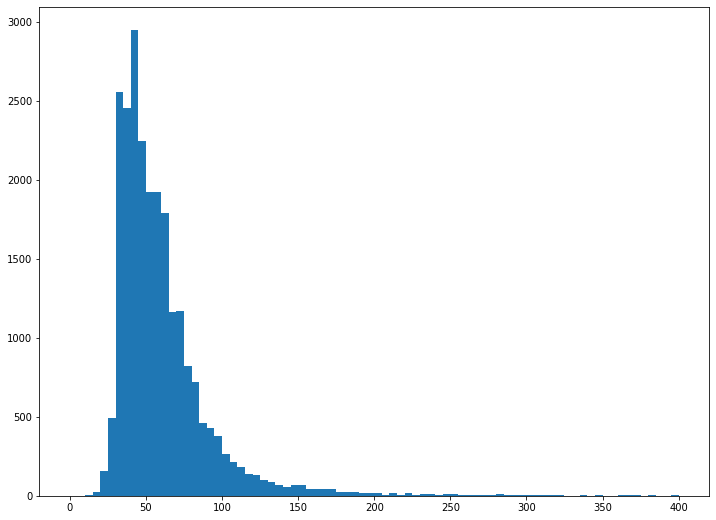

In [37]:
data['total_area'].hist(bins = 80, figsize = (12,9), grid = False, range = (0, 400))

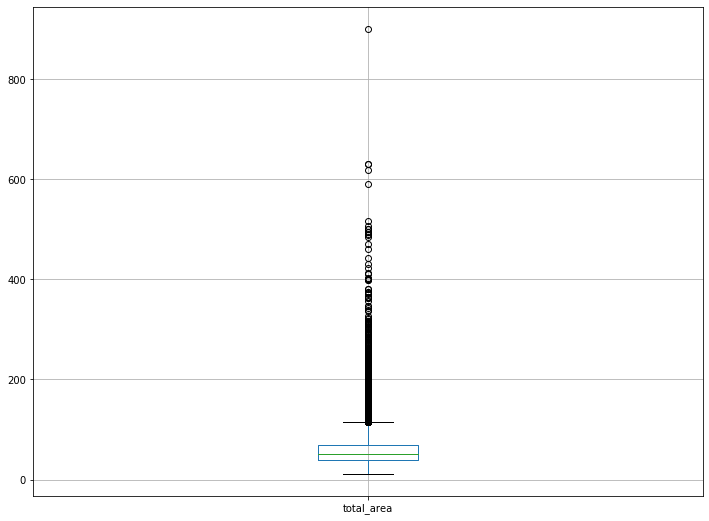

In [38]:
data.boxplot(column = 'total_area', figsize = (12, 9))

Похоже 900 действительно можно отнести к выбросу. Как и значения, которые лежат далее 300. Наиболее частотным является площадь в районе цифры 50, что отражено на описательных характеристика распределения. Вместе с эти, на гистограмме видно опредленное "уплотнение" данных возле значения 150. Возможно недвижимость с подобной площадью можно отнести к определенному сегменту.

Проанализируем данные в поле "last_price":

In [39]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Значения довольно сильно "разбросаны". Максимальное значение на порядок отлично от среднего и медианного. Посмотрим на бокплот:

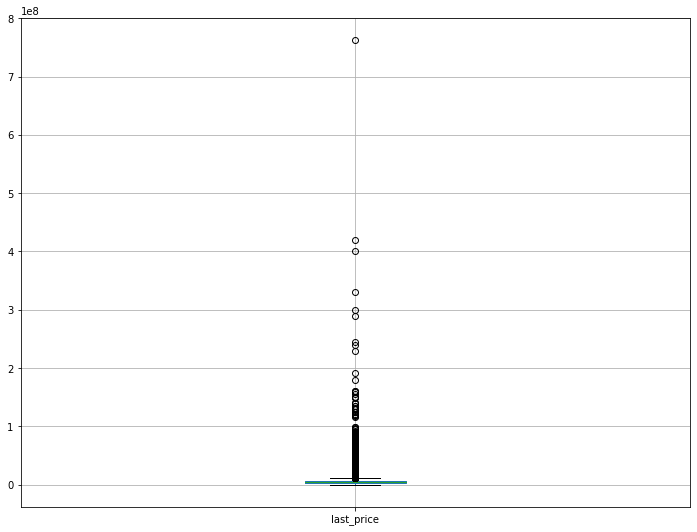

In [40]:
data.boxplot(column = 'last_price', figsize = (12, 9))

Похоже цены у нас любой вкус. Наиболее репрезентативным видятся значения не больше 20 млн. Посмотрим на гистограмму построенную в этом диапазоне:

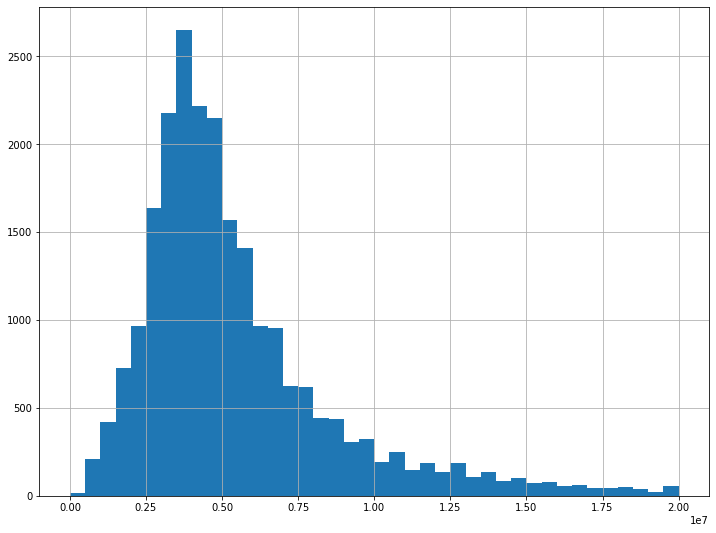

In [41]:
data['last_price'].hist(bins = 40, figsize = (12,9), range = (0, 20000000))

In [42]:
data[data['last_price'] < 20000000]['last_price'].describe()

count    2.284500e+04
mean     5.408335e+06
std      3.193483e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64

Значение в 4.5 млн самое частотное. Это любопытно, потому как при анализе площади самым частотным значением было 45. В этом случае, самой частотной ценой квадратного метра должна быть цифра в 100 тыс. Проверим:

In [43]:
data['meter_price'].value_counts()

100000.000000    258
83333.333333      64
75000.000000      58
80000.000000      52
125000.000000     51
                ... 
43076.923077       1
144475.920680      1
143324.607330      1
90067.720090       1
62111.801242       1
Name: meter_price, Length: 14882, dtype: int64

Действительно, квартиры с подобной ценой за квадратный метр наиболее распространены. Установим границу для анализируемого диапозона до 20 млн. Несмотря на наличие выбросов, необязательно они могут являться ошибочными, возможно это просто иной сегмент, который недостаточно представлен с точки зрения данных. Т.е. однозначно отбросить мы его не можем, но и стратифицировать его в рамках нашего анализа пока не вижу целесообразным, поэтому сделаем поправку, но в голову пока держим, что при необходимости здесь возможно можно будет найти что-то интересное. 

Посмотрим далее на поле со значениями числа комнат - 'rooms':

In [44]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [45]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

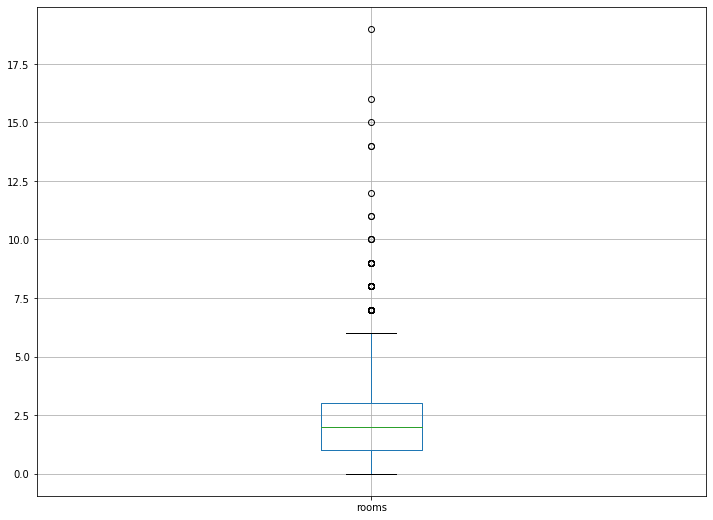

In [46]:
data.boxplot(column = 'rooms', figsize = (12, 9))

Похоже, где-то после 7 комнат значения становятся аномальными.

Далее оценим распределение для столбца 'ceiling_height':

In [47]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [48]:
data['ceiling_height'].value_counts()

2.65      9758
2.50      3515
2.60      1645
2.70      1571
3.00      1108
          ... 
3.98         1
4.65         1
5.80         1
4.90         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Значение в 100 походит на ошибку. Вероятно просто ошибка при вводе даннх, имеется всего лишь подобное значение. Посмтроим следующую гистограмму:

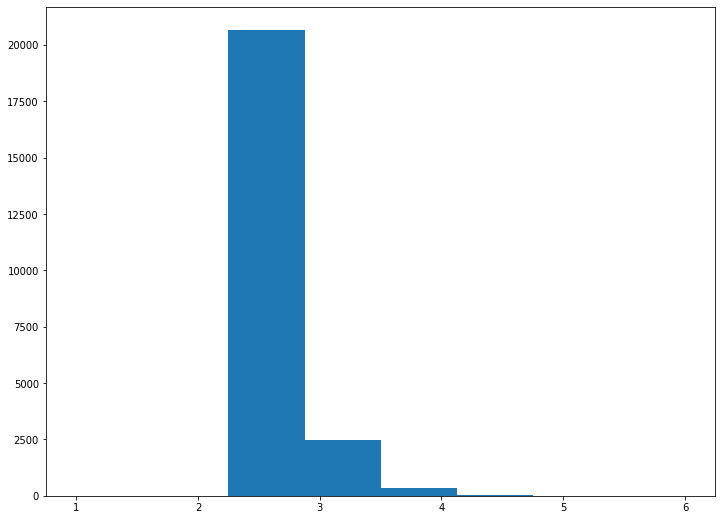

In [49]:
data['ceiling_height'].hist(bins = 8, range = (1, 6), figsize = (12,9), grid = False)

С потолками более менее понятно, высота их хоть и различается, но разброс значений невелик. В нашем случае потолки в 2.65 м являюстся наиболее распротраненными. Значения менее 6 метров мы используем как пороговое. 

Изучим время продажи квартиры. Для начала посмотрим на распределение значений в столбце 'days_exposition':

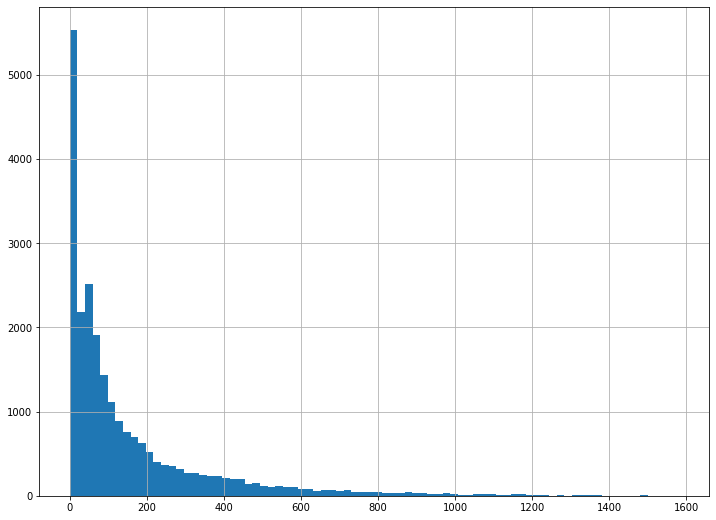

In [50]:
data['days_exposition'].hist(bins = 80, figsize = (12,9))

Помним, что актуальным объявлениям мы присвоили значение '0', поэтому подобные значения необходимо будет отфильтровать. На гистограмме мы можем эту созданную нами аномалию. Вместе с этим посмотрим на близлежащие минимальные значения:

In [51]:
data[data['days_exposition'] < 25]['days_exposition'].value_counts()

0     3171
7      234
4      174
3      157
5      152
14     147
9      142
20     139
8      138
11     135
13     128
18     128
10     127
22     125
21     124
6      124
15     124
19     122
17     116
24     116
23     111
12     108
16     100
2        3
1        1
Name: days_exposition, dtype: int64

Похоже вместе с нулевым значением, значения '2' и '1' также аномально низки. Вряд ли квартиры продаются за один или два дня, вероятней всего объявление было снято с публикации досрочно по каким-либо причинам, либо это просто опробирование сервиса со стороны пользователей. Однако начиная с 3 дней значения уже больше похоже на правду, поэтому начиная с этого значения и будем анализировать наши данные.

Помимо этого наблюдаем длинный хвост у распределения. Посмотрим дополнительно на боксплоте:

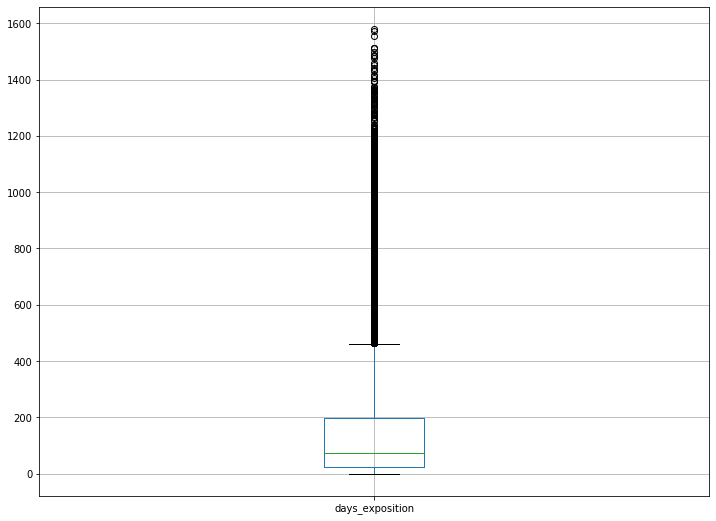

In [52]:
data.boxplot(column = 'days_exposition', figsize =(12,9))

Видим какие значения оказались в дали от среднего. Ближе к 1600 и того, возникает лишь несколько случаев. Построим дополнительно рейтинг самых долгих объявлений:

In [53]:
data.sort_values(by = 'days_exposition', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,p_day,p_month,p_year,floor_category,t/l ratio,t/k ratio
18843,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,True,...,NaN,NaN,1580,72614.107884,15,12,2014,другой,1.759124,6.259740
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,...,3.0,569.0,1572,364076.784969,9,12,2014,другой,1.643225,4.790000
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,True,...,0.0,0.0,1553,132500.000000,9,12,2014,другой,1.818182,5.333333
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,True,...,0.0,0.0,1513,167085.427136,9,12,2014,другой,1.864169,4.422222
20969,18,13300000,133.00,2015-02-11,4,3.00,5,58.00,2,True,...,1.0,534.0,1512,100000.000000,11,2,2015,другой,2.293103,2.955556
6691,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,True,...,3.0,232.0,1512,102373.196836,12,12,2014,первый,2.295940,3.800177
14093,7,9500000,100.00,2015-02-19,4,3.00,5,76.00,5,True,...,0.0,0.0,1497,95000.000000,19,2,2015,последний,1.315789,10.000000
15313,1,9278000,139.80,2014-12-28,4,2.80,5,30.00,4,True,...,0.0,0.0,1489,66366.237482,28,12,2014,другой,4.660000,15.362637
19123,9,5990000,82.00,2015-02-19,3,3.00,4,60.00,2,True,...,2.0,458.0,1485,73048.780488,19,2,2015,другой,1.366667,10.250000
11955,4,11400000,76.00,2014-12-09,2,2.65,9,36.00,3,True,...,0.0,0.0,1484,150000.000000,9,12,2014,другой,2.111111,5.428571


И на гистограмму для них же:

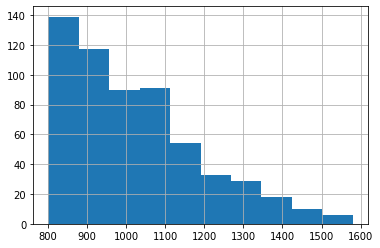

In [54]:
data[data['days_exposition'] > 800 ]['days_exposition'].hist()

Похоже значениями после отметки в 1200 можно смело "пожертвовать" как аномальными без особого ущерба репрезентативности датасета. Потенциально объявления с аномально высоким "сроком годности" могли появится в результате того, что их просто не убирали из публикации после того, как недвижимость была реализована. В качестве рекомендации по повышению качества данных могло бы быть мероприятие по установленю крайнего срока в системе, после которого объявление необходимо продливать, в противном случае оно автоматически снимается с публикации. 

Мы тем временем настраиваем наш фильтр:

In [55]:
clean_data = data.query('days_exposition > 3 & days_exposition < 1200')

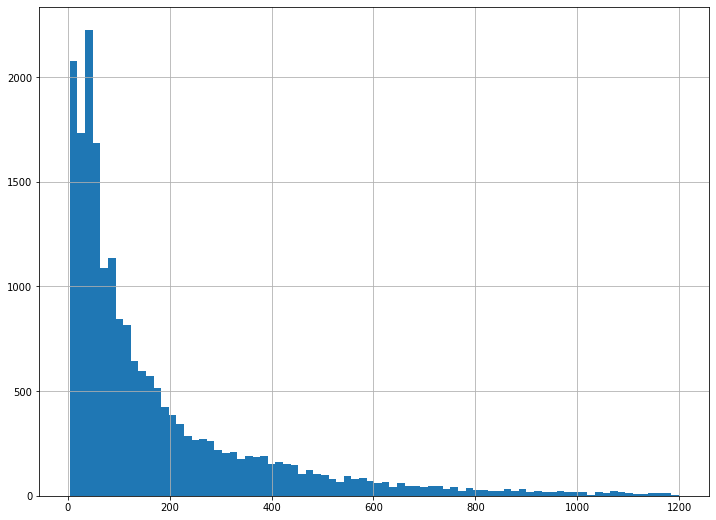

In [56]:
clean_data['days_exposition'].hist(bins = 80, figsize = (12,9))

И посмотрим описательные характеристики по полю 'days_exposition':

In [57]:
clean_data['days_exposition'].describe()

count    20142.000000
mean       176.974779
std        206.447663
min          4.000000
25%         45.000000
50%         96.000000
75%        230.000000
max       1199.000000
Name: days_exposition, dtype: float64

Видно, что среднее значение сильно отличается от медианного, это влияние длинного хвоста распределения. Тем не менее в среднем объявелние снимается через 3 месяца после публикации, что предположительно связано с фактом продажи недвижимости. Далее частотность значений по-видимому начинает уменьшатсья. 

Попробуем дополнительно посмотреть на распределение значений в рамках 3 месяцев:

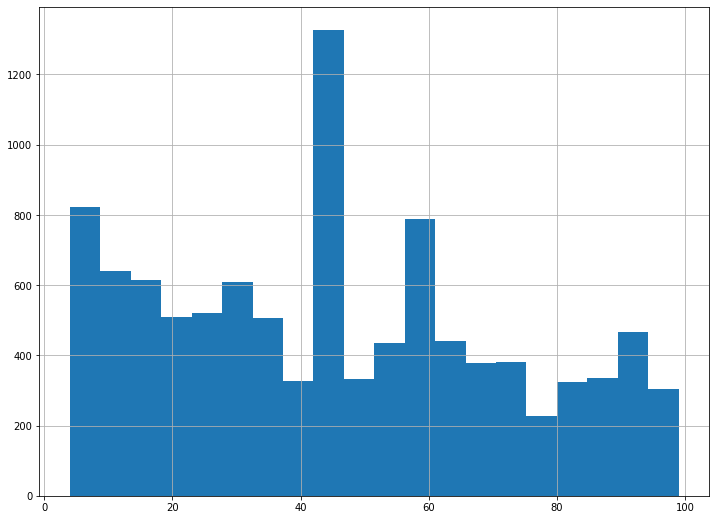

In [58]:
clean_data[clean_data['days_exposition'] < 100]['days_exposition'].hist(bins = 20, figsize = (12,9))

## Вывод:

- мы проанализировали ряд полей и определили границы значений в рамках которых будем осуществлять дальнейших анализ. В частности для следующих параметров мы определели:

    - "total area" < 300
    - "last price" < 20 млн
    - "rooms" < 7
    - "ceiling height" < 6
    - "days_exposition" > 3 & "days_exposition" < 1200
    
- также был проанализированы параметр определяющий длительность продажи. В частности мы можем наблюдать "всплеск" продаж в самом начале срока, после небольшое затухание и дальше отдельные пики. Сам всплеск может быть связан с "качественными" предложениями, либо предложения ниже рыночной стоимости, либо срочной продажи. Далее идет некий период когда хорошие предложения "вымывает", далее первый пик в районе 40 с лишним дней, похоже на наиболее оптимальыне срок продажи. Здесь больше всего значений и срок похож на реальность, все-таки продажа квартиры дело не одной недели. Далее можем видеть еще пики, но уже меньше и по нисходящей. Есть предположение, что на этом отрезке идет изменение характеристик предложения, что в итоге приводит к продаже, либо "незименения" и это приводит к затяжной экспозиции.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Отлично, что оценили и изучили наши данные практически вдоль и поперек :)     
</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера</h2>

Теперь давай подумаем над тем, как нам автоматизировать построение графиков через цикл `for`. 
    
Почему это важно? 
    
- экономим своё время
- оптимизируем код
- делаем работу презентабельнее
    
---
    
Из дополнительных идей. Так как мы делаем повторяющиеся действия, имеет смысл построить функцию для построения графиков и с помощью неё далее использовать цикл.
    
---
    
Если вдруг у тебя возникнут вопросы, ты можешь задать их мне прямо в работе или обратиться к своему наставнику.

</div>

Привет! Не совсем понял замечание, можно ли уточнить ? Для каждого графика разные параметры корзин, да и сами типs диаграмм разные. Если передавать эти параметры в качестве аргументов в функцию, то мне кажется это не очень удобно, т.к. возможно для одного из графиков потом возможно понадобится изменить какие-либо параметры, либо даже добавить что-то. В этом случае проще скопипастить. Возможно я не понимаю, что именно имеется ввиду. Но допустим сдеалть это можно было бы вот так:

In [2]:
def chart_builder(data, bins):
    for i in data:
        i.hist( bins = bins, figsize = (12,9)) 
        plt.show    

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Согласен, что стоит обращать внимание на количество бинов. Стоит попробовать подобрать либо оптимальное количество, 25 или 50 например. 
    
Или создать список по количеству бинов, чтобы точечно подойти к решению этой задачи.
    
---
    
Вопрос весь в том, когда графиков будет много 10 или 15, то это трудозатратно будет для каждого подбирать количество объектов.
    
---
    
Мне важно понимать в том числе, что ты разобрался в том как автоматизировать графики. Функция `chart_builder` принята :) 
    
</div>

Учитывая выводы из предыщуего блока сформируем датафрейм, который будем исопользовать для нашей задачи: 

In [59]:
our_data = data[(data["total_area" ] < 300) & 
                (data["last_price" ] < 20000000) & 
                (data["rooms" ] < 7) & 
                (data["rooms" ] > 0) &
                (data["ceiling_height" ] < 6) & 
                (data["days_exposition" ] < 1200) &
                (data["days_exposition" ] > 3)
               ]
our_data = pd.DataFrame(our_data)

Оценим масштаб отсортированных значений по отношению к исходному датасету:

In [60]:
len(our_data) / len(data) * 100

82.41035433906217

И посмотрим на всякий на общее о таблице:

In [61]:
our_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19420 entries, 1 to 23697
Data columns (total 29 columns):
total_images            19420 non-null int64
last_price              19420 non-null int64
total_area              19420 non-null float64
first_day_exposition    19420 non-null datetime64[ns]
rooms                   19420 non-null int64
ceiling_height          19420 non-null float64
floors_total            19420 non-null int64
living_area             19420 non-null float64
floor                   19420 non-null int64
is_apartment            19420 non-null bool
studio                  19420 non-null bool
open_plan               19420 non-null bool
kitchen_area            19420 non-null float64
balcony                 19420 non-null int64
locality_name           19420 non-null object
airports_nearest        14890 non-null float64
cityCenters_nearest     14907 non-null float64
parks_around3000        14907 non-null float64
parks_nearest           14907 non-null float64
ponds_around3

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Достаточно большой объем данных потеряли, однако избавились от выбросов.

</div>

Используя новый датафрейм попробуем оценить какие факторы больше всего влияют на стоимость квартиры. Для начала посмотрим на сколько зависит цена от общей площади:

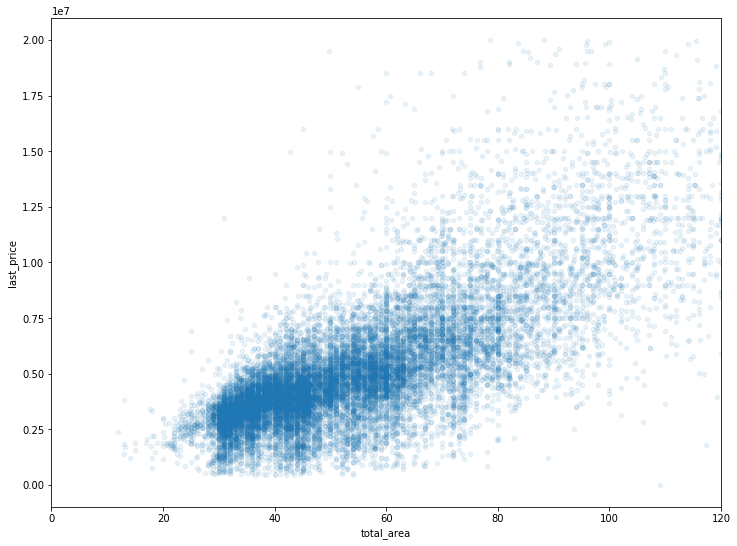

In [62]:
our_data.plot(x='total_area', y='last_price', kind='scatter', figsize = (12,9), alpha = 0.09, xlim = (0, 120))

Похоже здесь мы наблюдаем довольно логичную прямо пропорциональную зависимость цену от площади. Также на графике видны "уплотнения" в диапазоне наиболее частотных предложений. Более интересный вопросом было бы насколько эта связь "сильна" в отношении нашего набора данных. Оценим:

In [63]:
(our_data['last_price'].corr(our_data['total_area']))

0.769652198585619

Корреляция выше среднего. В отношении нашего набора данных однозначно определяем общую площадь, как параметр вилящий на цену.

Далее рассмотрим фактор удаленности от центра, который должен проявить аналогичную с общей площадью зависимостью. И сразу же рассчитаем коэффициент Пирсона: 

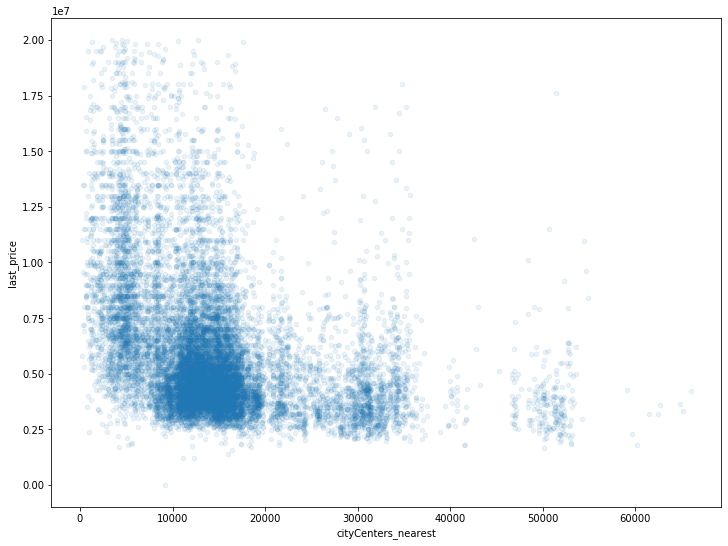

In [64]:
our_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize = (12,9), alpha = 0.09)

In [65]:
(our_data['cityCenters_nearest'].corr(our_data['last_price']))

-0.3599708803539194

Гипотеза подтверждается, чем ближе к центру тем цены выше. Отдельные участики более проявлены на диаграмме. Вновь возможна связть с частотностью той или иной позиции, но также похоже есть возможность дополнительной стратификации по этому признаку.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Здорово, что мы используем корреляцию. Это отличный инструмент.
    
Было бы здорово визуализировать матрицу корреляции. 
    
В этом нам поможет библиотека `seaborn` и готовый в ней метод `heatmap`.


</div>

Далее смотрим на оценку зависимости цены от количества комнат:

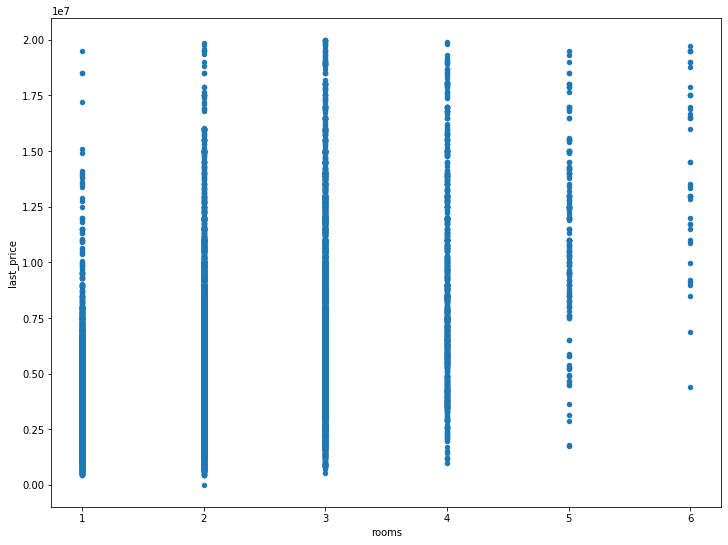

In [66]:
our_data.plot(x='rooms', y='last_price', kind='scatter', figsize = (12,9))

Количество комнат также записываем в факторы влияющие на цену. По общей картинке видим, что чем больше комнат тем больше цена концентрируется у границы верхнего диапазона и наоборот.

Оценим влияние этажа квартиры на цену:

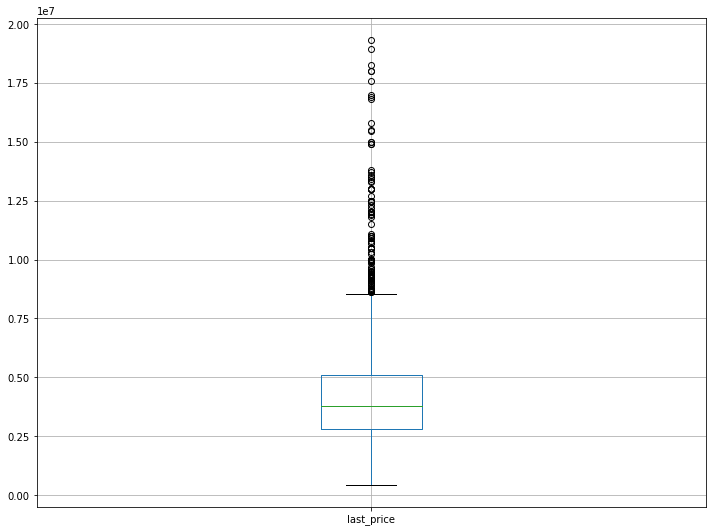

In [67]:
first = our_data[our_data['floor_category'] == 'первый']
first.boxplot(column = 'last_price', figsize =(12,9))
#['last_price'].hist(range =(0,20000000))

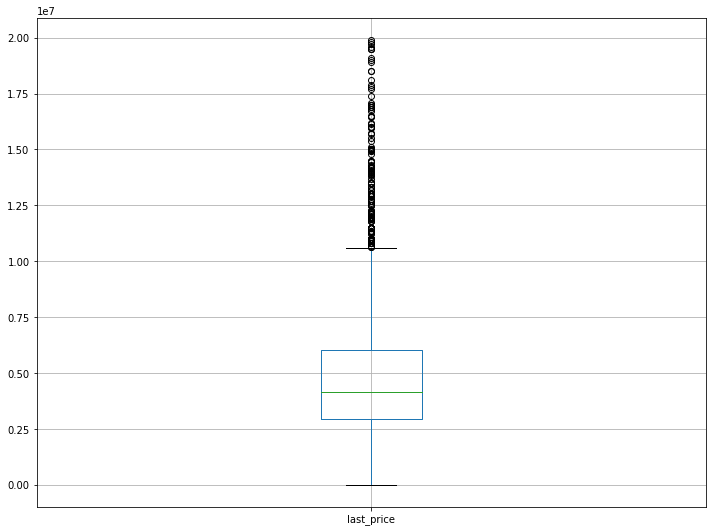

In [68]:
last = our_data[our_data['floor_category'] == 'последний']
last.boxplot(column = 'last_price', figsize =(12,9))

Похоже последний этаж все же более популярен, а значит и платить за него готовы больше, чем за первый. С другой стороны различие вроде бы не критичное. Фактор влияет на цену, но не всегда. В конце концов не все могут любить последний этаж, кто-то любит и первые. 

Изучим зависимость цены от даты размещения: дня недели, месяца и года. 

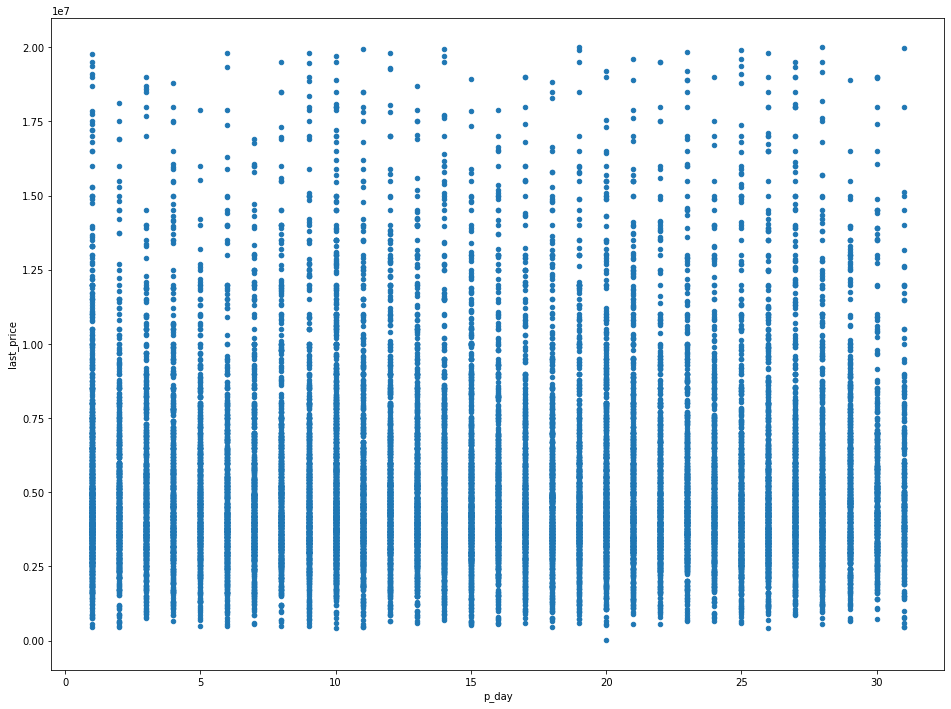

In [69]:
our_data.plot(x='p_day', y='last_price', kind='scatter', figsize = (16,12))

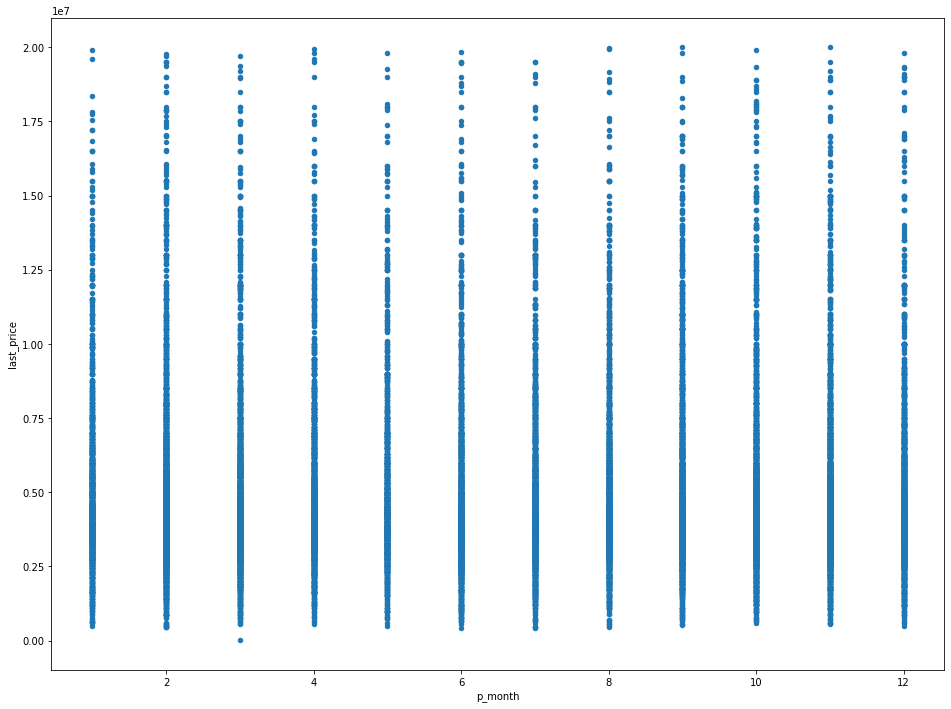

In [70]:
our_data.plot(x='p_month', y='last_price', kind='scatter', figsize = (16,12))


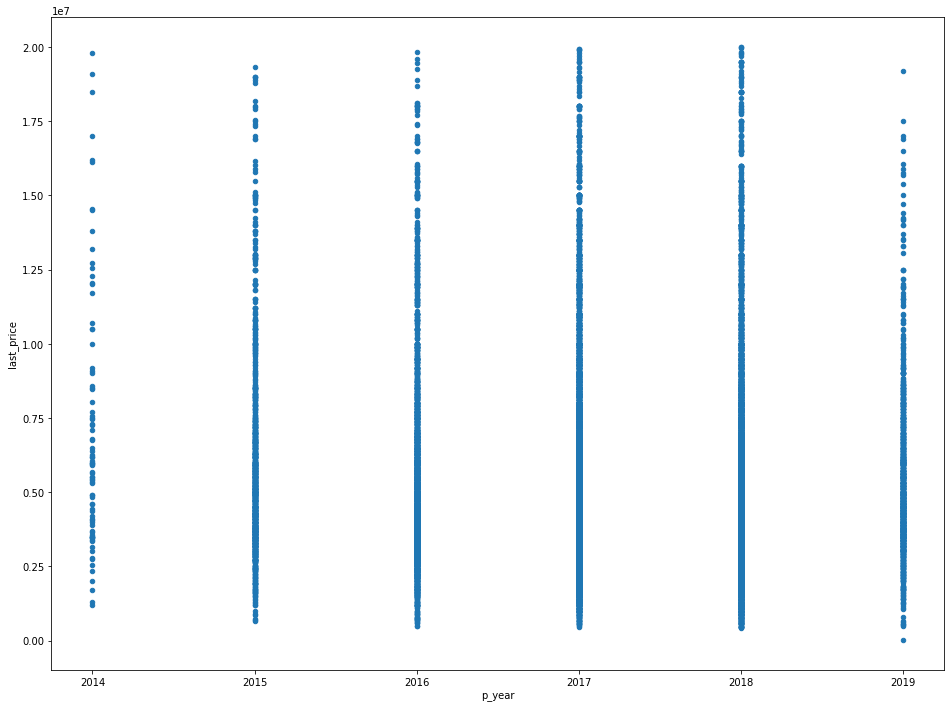

In [71]:
our_data.plot(x='p_year', y='last_price', kind='scatter', figsize = (16,12))

Для даты на первый взгялд корреляции либо какого либо патерна не наблюдается. Довольно разношерстная картинка. Другое дело аналогичная диаграмма по месяцам. Разрбосы плюс минус одинаковые, однако в середине разрброс плотность более "редкая", возможно здесь присутствует некая сезонность, требуется посмотреть дополнительно. С годами все иначе. Здесь картинка меняется от года к году. Думаю, что здесь уже накладываются экономические циклы, либо "черные лебеди" непосредственно на этом рынке. Здесь уженеобходимо мнение экспертов.


Дополнительно проанализируем  10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. Для этого посмотрим на следующую группировку:

In [72]:
our_data.groupby('locality_name').count().sort_values(by = 'total_images', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,p_day,p_month,p_year,floor_category,t/l ratio,t/k ratio
locality_name,,,,,,,,,,,,,,,,,,,,,
санкт-петербург,12771,12771,12771,12771,12771,12771,12771,12771,12771,12771,...,12754,12754,12771,12771,12771,12771,12771,12771,12771,12771
посёлок мурино,484,484,484,484,484,484,484,484,484,484,...,0,0,484,484,484,484,484,484,484,484
посёлок шушары,400,400,400,400,400,400,400,400,400,400,...,398,398,400,400,400,400,400,400,400,400
всеволожск,333,333,333,333,333,333,333,333,333,333,...,0,0,333,333,333,333,333,333,333,333
колпино,303,303,303,303,303,303,303,303,303,303,...,302,302,303,303,303,303,303,303,303,303
пушкин,297,297,297,297,297,297,297,297,297,297,...,297,297,297,297,297,297,297,297,297,297
посёлок парголово,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
деревня кудрово,282,282,282,282,282,282,282,282,282,282,...,0,0,282,282,282,282,282,282,282,282
гатчина,264,264,264,264,264,264,264,264,264,264,...,0,0,264,264,264,264,264,264,264,264


Далее используем полученную информацию для создания следующего среза:

In [73]:
our_data_rating = our_data.query("locality_name == 'пушкин' or locality_name == 'колпино' or locality_name == 'посёлок парголово' or  locality_name == 'гатчина' or locality_name == 'деревня кудрово' or  locality_name == 'выборг' or locality_name == 'всеволожск' or locality_name == 'посёлок шушары' or locality_name == 'посёлок мурино' or locality_name == 'санкт-петербург' ")
#не очень изящный способ, но лучше ничего не пришло в голову, буду признателен за подсказку

In [74]:
our_data_rating.pivot_table(index="locality_name", values="meter_price").sort_values(by = 'meter_price', ascending = False)

,meter_price
locality_name,
санкт-петербург,106900.996278
пушкин,100808.398817
деревня кудрово,92226.920999
посёлок парголово,89625.579094
посёлок мурино,85038.051839
посёлок шушары,77635.125084
колпино,74834.866691
гатчина,67916.895833
всеволожск,66832.394518


Здесь, опять же ожиадем столица на первом месте рейтинга. А вот последнее место отходит Выборгу.

Далее двигаемся по заданию - "Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра."

Начнем с разреза по Питеру:

In [75]:
our_data_strat = our_data[our_data['locality_name'] == 'санкт-петербург']
our_data_strat = pd.DataFrame(our_data_strat)

Создаем столбец с расстоянием до центра в километрах:

In [76]:
our_data_strat['new_scale'] = round(our_data_strat['cityCenters_nearest'] / 1000, 0)

Посчитаем среднюю цену для каждого километра и построим график:

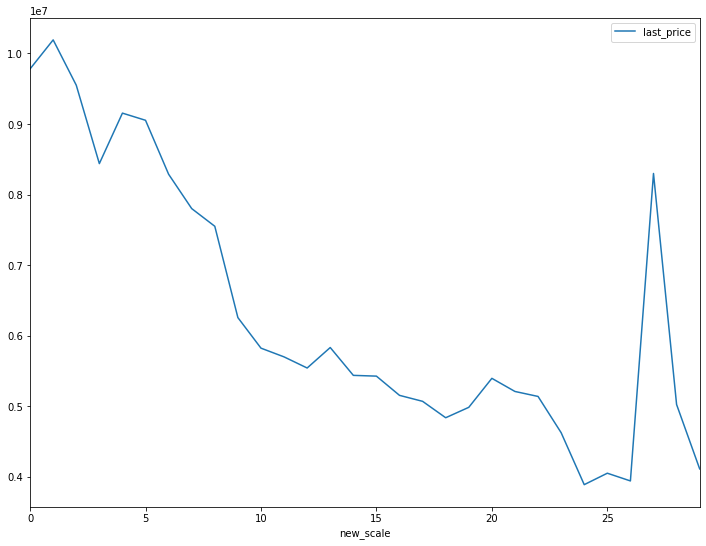

In [77]:
our_data_strat_pivot = our_data_strat.pivot_table(index="new_scale", values="last_price")
our_data_strat_pivot.plot( figsize = (12,9))


Любопытный "скачок" за 25 километром. Вероятно это уже уже загородная недвижимость. Между же 25 и 10 км цена более менее однородна, а вот начиная с 10 км рост цен начинает набирать "высоту". Можно предположить, что менее 10 км и есть та сама "центральная зона".

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Верно.
</div>

Проанализируем интересующие нас параметры в пределах этой зоны. Но для начала вспомним, что у нас присутствовало множетство пропущенных значений и посмотрим на их распределение в нашейм новой таблице:

In [78]:
center_data = our_data_strat[our_data_strat['new_scale'] < 10]
center_data = pd.DataFrame(center_data)
center_data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        2
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
meter_price             0
p_day                   0
p_month                 0
p_year                  0
floor_category          0
t/l ratio               0
t/k ratio               0
new_scale               0
dtype: int64

Похоже мы правильно сделали, что не стали тратить ресурсы на избыточную предобработку данных. Изучим набор параметров для центра. Начнем с площади: 

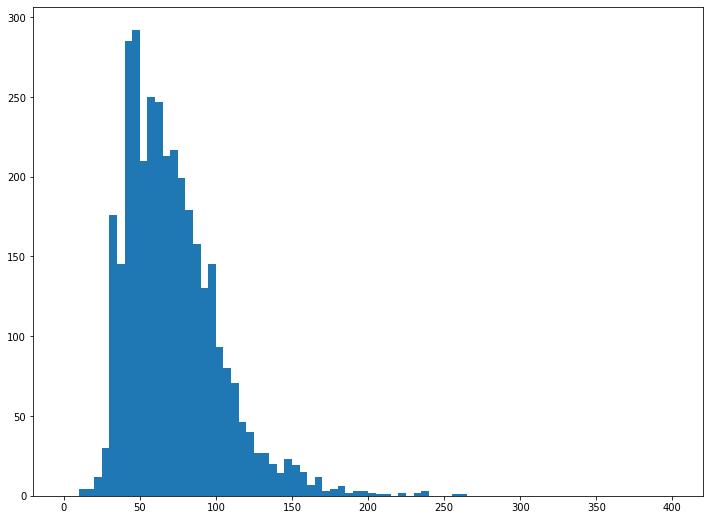

In [79]:
center_data['total_area'] = round(center_data['total_area'], 0)
center_data['total_area'] = center_data['total_area'].astype('int')
center_data['total_area'].hist(bins = 80, figsize = (12,9), grid = False, range = (0, 400))

In [80]:
center_data['total_area'].describe()

count    3424.000000
mean       71.273364
std        31.066824
min        12.000000
25%        47.000000
50%        66.000000
75%        87.000000
max       264.000000
Name: total_area, dtype: float64

Можно заметить, что распределение схоже с тем, которые мы делали всему датасету. Судя по всему это будет справедливо и для Питера в частности:

In [81]:
our_data_strat['total_area'].describe()

count    12771.000000
mean        58.356980
std         25.017054
min         12.000000
25%         41.000000
50%         52.000000
75%         69.700000
max        263.800000
Name: total_area, dtype: float64

Тем не менее видно, что распределение смещено вправо отосительно данных по городу. Для центра большие площади более частотны. 

Посмотрим на цену:

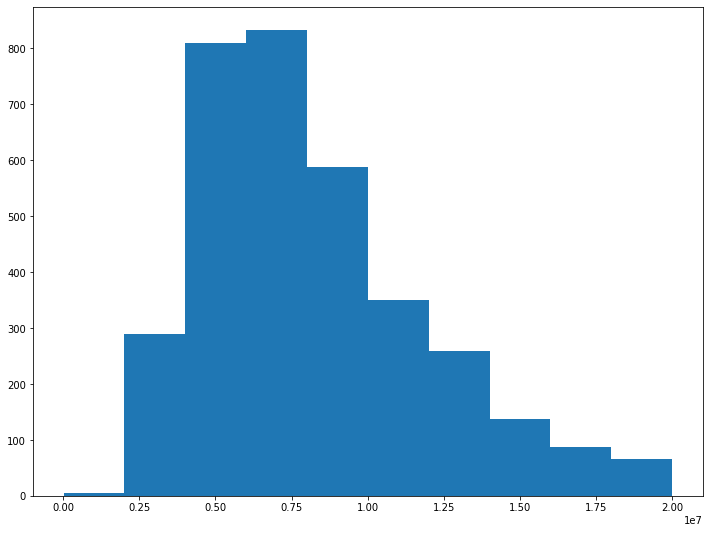

In [82]:
center_data['last_price'].hist( figsize = (12,9), grid = False)

In [83]:
center_data['last_price'].describe()

count    3.424000e+03
mean     8.291020e+06
std      3.718943e+06
min      1.219000e+04
25%      5.500000e+06
50%      7.500000e+06
75%      1.040000e+07
max      1.999900e+07
Name: last_price, dtype: float64

Здесь ситуация схожая. Цена в среднем гораздо выше.

Оценим факторы влияющие на стоимость квартиры. Сделаем это с помощью матрицы:

In [84]:
center_data_stat = center_data[['last_price', 'rooms', 'floor', 'cityCenters_nearest']]
center_data_stat.corr().head(1)

,last_price,rooms,floor,cityCenters_nearest
last_price,1.0,0.520761,0.090611,-0.263603


Число комнат очевидно самы сильный фактор из данного набора. Посмотрим на него поближе:

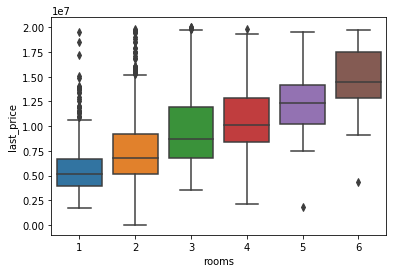

In [85]:
sns.boxplot  (x = 'rooms', y = 'last_price', data = center_data)

### Шаг 5. Общий вывод

Целью проекта было установление параметров для определения рыночной стоимости недвижимости на примере данных по в Санкт-Петербургу и соседним населённым пунктам за несколько лет. 

Опирась на результаты анализа ниже приводится перечень ключевых параметров:

- общая площадь;
- количество комнат;
- удаленность от центра;
- категория этажа.

Данные по этим параметрам могут использоваться для расчета диапазонов выход за рамки которых будет сигналом для более детального анализа конкретного объявления на предмет мошенической деятельности.

Отдельно стоит отметить стратифицировать недвижимость в центре. В данном сегменте значения подобных диапазонов будут несколкьо отличаться от значений параметров не в центре, как и в других населенных пунтках.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Выводы понятны и логичны. Рекомендую разбавить их полученными фактами, так они будут выглядеть конкретнее.
    
Давай постараемся учесть все мои комментарии, чтобы сделать наш проект ещё лучше :)
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>
   
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.

Успехов тебе в новых проектах!
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок первого уровня
  
--- 
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод